In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
grade= pd.read_csv('student_scores.csv')

In [40]:
print(grade)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [9]:
grade.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
grade.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [13]:
grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


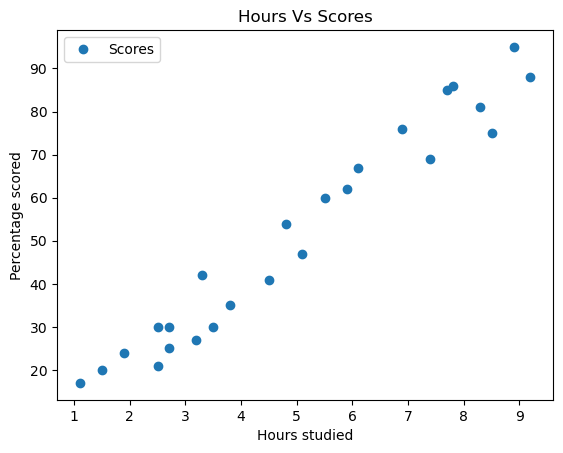

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [16]:
grade.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.title('Hours Vs Scores')
plt.show()
print(grade.corr())

In [19]:
#for model fitting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [21]:
#defing X & Y and splitting the data
x = grade.iloc[:, :-1].values
y = grade.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [23]:
#Training on training set
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [24]:
regressor.score(x_test, y_test)

0.9454906892105356

In [27]:
#creating a Function for prediction
pred_y = regressor.predict(x_test)
prediction = pd.DataFrame({"Hours": [i[0] for i in x_test], 'predicted % grade': [k for k in pred_y]})
prediction

,Hours,predicted % grade
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


Text(0, 0.5, 'Marks')

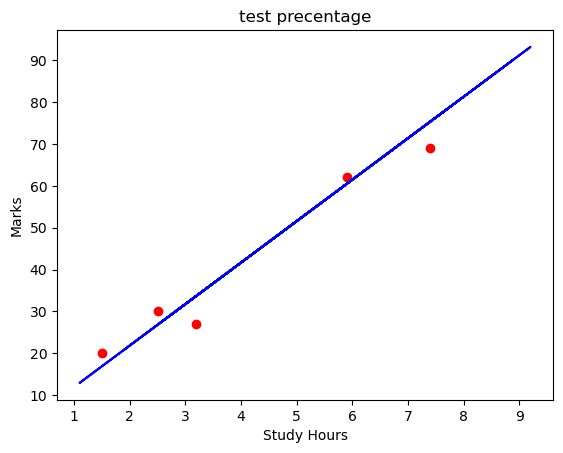

In [29]:
#Visual test
plt.scatter(x_test, y_test, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color= 'blue')
plt.title('test precentage')
plt.xlabel('Study Hours')
plt.ylabel('Marks')

In [30]:
#creating a Function for training set
pred_y = regressor.predict(x_train)
prediction = pd.DataFrame({"Hours": [i[0] for i in x_train], 'predicted % grade': [k for k in pred_y]})
prediction

,Hours,predicted % grade
0,3.8,39.678655
1,1.9,20.848407
2,7.8,79.321281
3,6.9,70.401690
4,1.1,12.919882
5,5.1,52.562508
6,7.7,78.330215
7,3.3,34.723326
8,8.3,84.276609
9,9.2,93.196200


Text(0, 0.5, 'Marks')

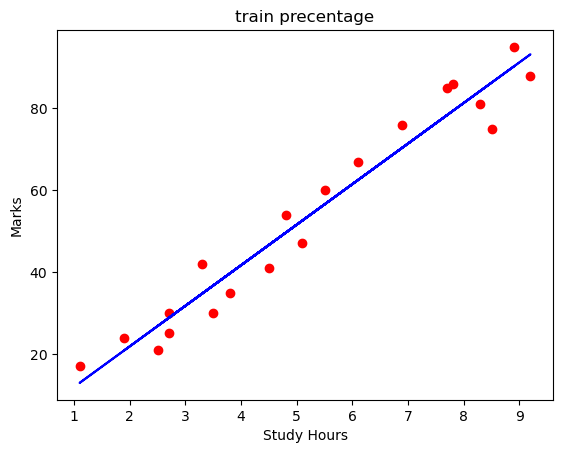

In [31]:
#Visual train
plt.scatter(x_train, y_train, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color= 'blue')
plt.title('train precentage')
plt.xlabel('Study Hours')
plt.ylabel('Marks')

In [75]:
n = float(input(''))
hours = [n]
answer = regressor.predict([hours])
print(answer)

24.0
[239.87391558]


### answer

#### 